In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
df = pd.read_csv('NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
# Get the number of trading days

df.shape

(1009, 7)

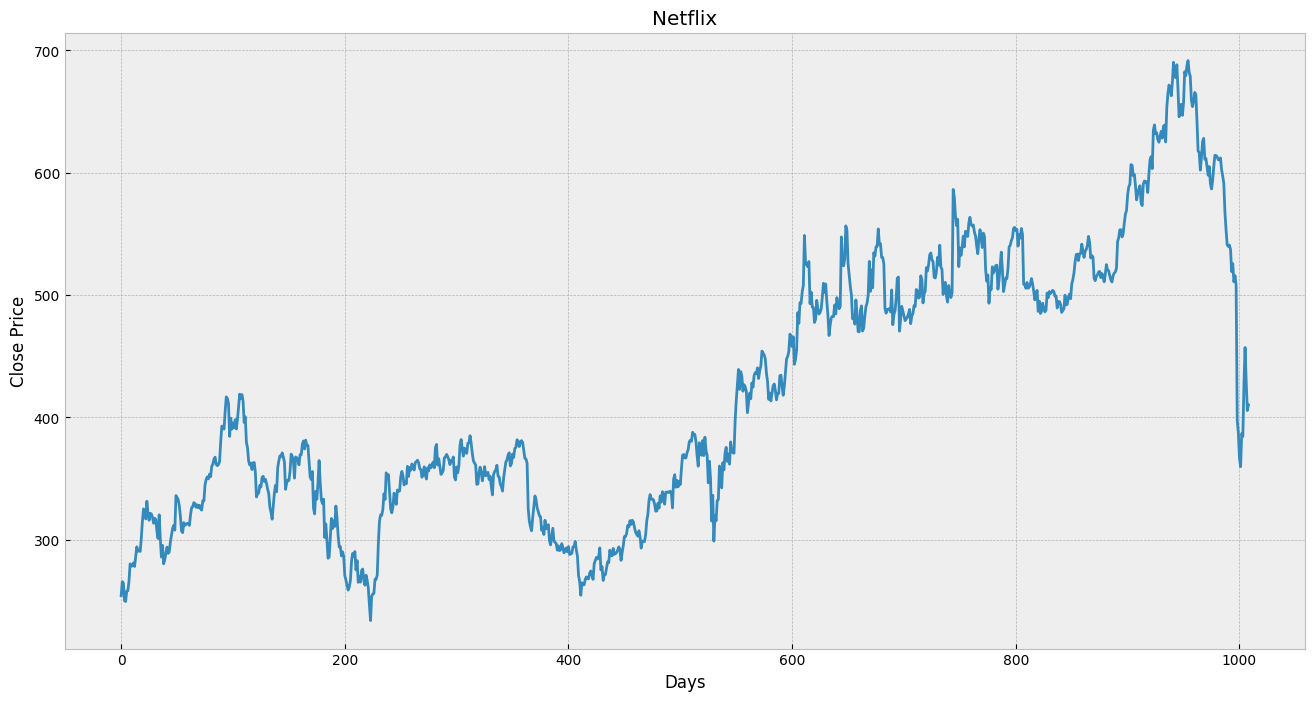

In [5]:
# Visualize the close price data

plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price')

plt.plot(df['Close'])

plt.show()

In [6]:
# Get the close price

df = df[['Close']]

df.head(5)

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [8]:
# Create a variable to predict 'x' days out into the future

future_days = 25

# Create a new column (target) shifted 'x' units/days up

df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [10]:
# Create the feature data set (X)
# and convert it to a numpy array and remove
# the last 'x' rows/days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_41157/2069783459.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [11]:
# Create the target data set (y)
# and convert it to numpy array
# get all of the target values except the last
# 'x' rows/days

y = np.array(df['Prediction'])[:-future_days]
print(y)

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [12]:
# Split the data into 75% training and 25 % testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [13]:
# create the models
# create the decision tree regressor model

tree = DecisionTreeRegressor().fit(x_train, y_train)

# create the linear regression model

lr = LinearRegression().fit(x_train, y_train)

In [14]:
# Get the last 'x' rows of the feature data set

x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_41157/2388708919.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [16]:
# Show the model tree prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression predict
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[602.440002 663.840027 591.150024 567.52002  553.289978 541.059998
 515.859985 540.840027 537.219971 691.690002 405.600006 510.799988
 515.859985 508.25     397.5      387.149994 366.420013 359.700012
 386.700012 427.140015 427.140015 457.130005 405.600006 405.600006
 410.170013]

[637.59294315 644.1517522  642.54553204 622.96735982 601.43493915
 600.2748398  587.47856425 596.90178264 608.40419373 610.63506993
 595.39370855 595.98263577 589.64696967 583.78421987 590.07528005
 577.60023818 573.73634454 579.99173033 589.96820246 598.28491518
 598.15109563 597.2854871  595.13494654 594.98320769 596.36639466]


/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_41157/356841269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


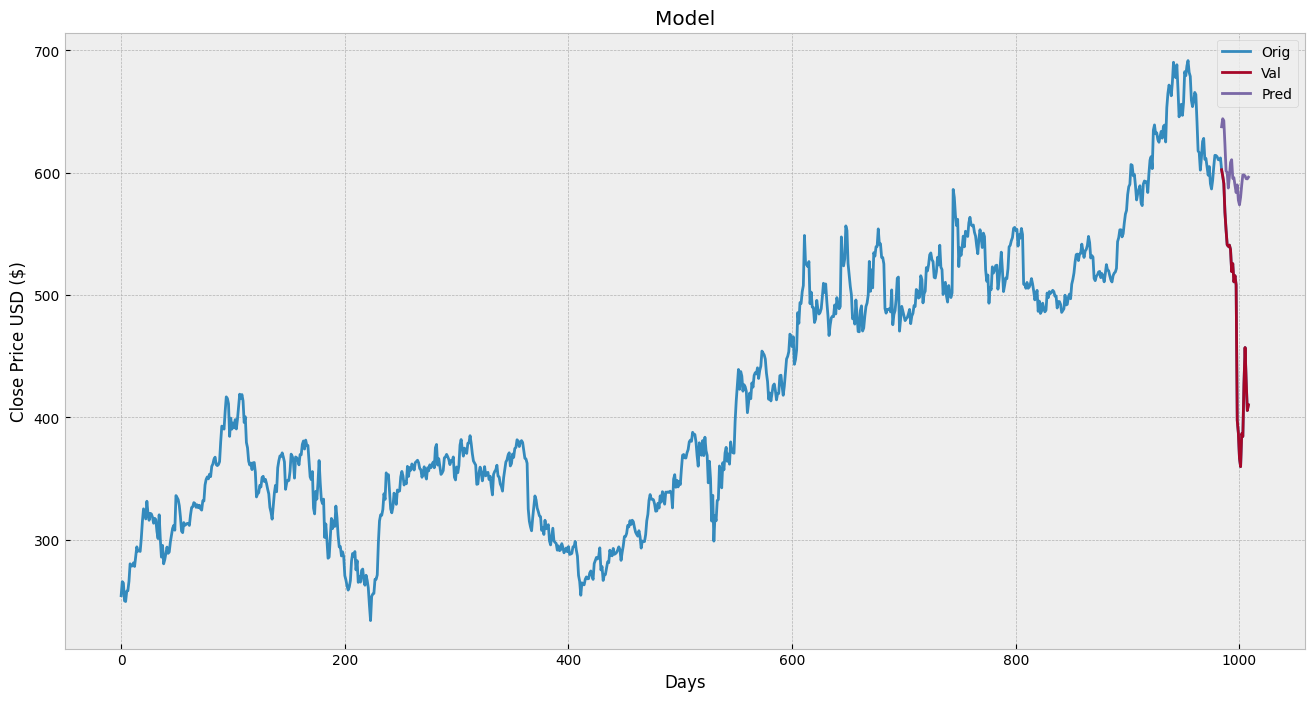

In [19]:
# Visualize the data

predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

plt.show()

/var/folders/lk/p4rmv9cx45d_zk5h2j11pwl40000gn/T/ipykernel_41157/296332941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


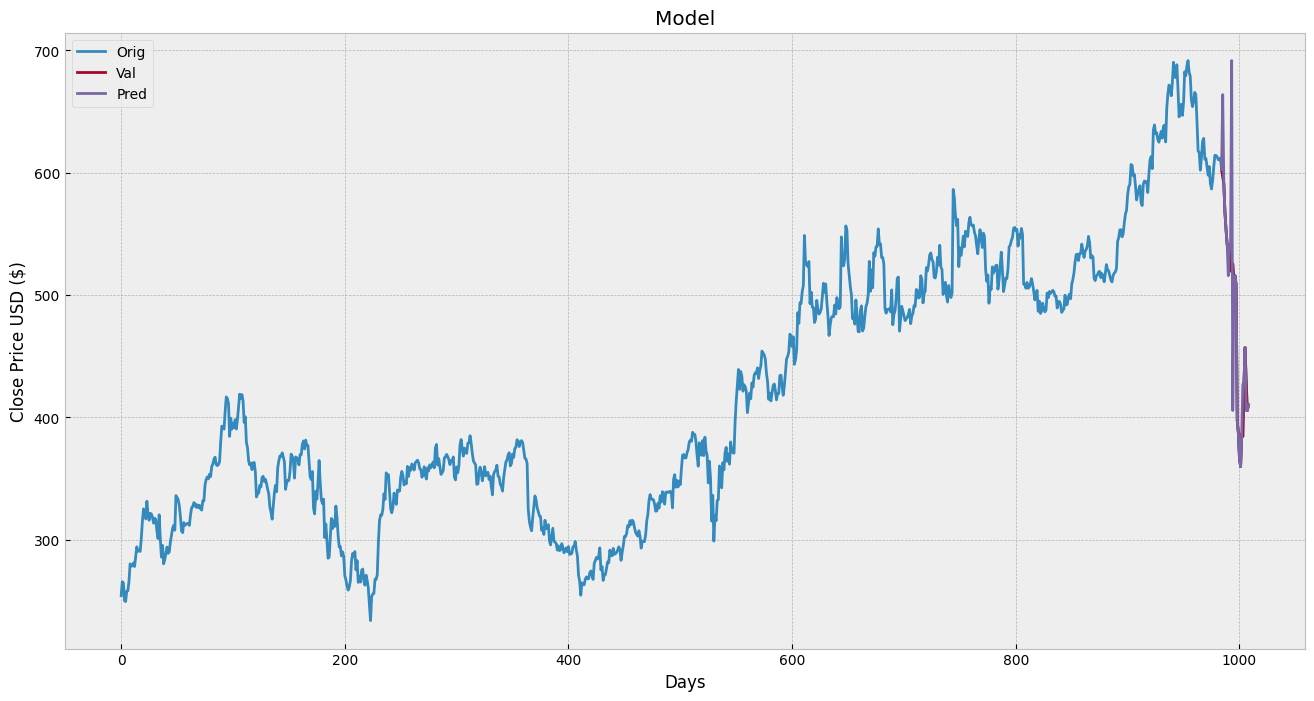

In [20]:
# Visualize the data

predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

plt.show()